<a href="https://colab.research.google.com/github/solimanragab11/Soliman-s/blob/main/AI_plat_sec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Solimans_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)
        output = output * self.w20
        return output

In [4]:
my_model=Solimans_cnn()

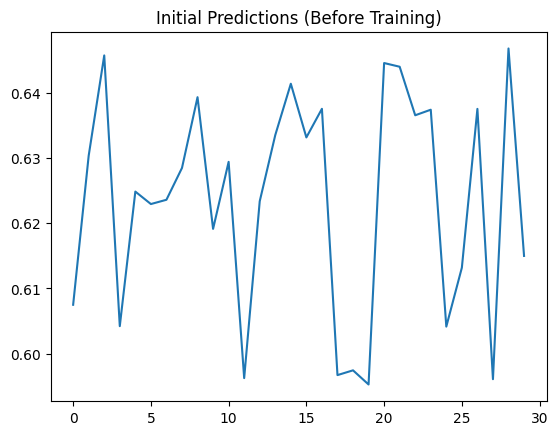

In [5]:
input_data = torch.rand(10, 3)
predictions_before_training = my_model(input_data).detach().numpy()

sns.lineplot(data=predictions_before_training.flatten())
plt.title('Initial Predictions (Before Training)')
plt.show()

In [7]:
simpleNN = Solimans_cnn()
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [8]:
Y = my_model(X)
Y

tensor([0.6497, 0.6514, 0.6530, 0.6546, 0.6562, 0.6577, 0.6592, 0.6607, 0.6621,
        0.6635, 0.6648, 0.6662, 0.6675, 0.6687, 0.6700, 0.6712, 0.6723, 0.6735,
        0.6746, 0.6757, 0.6768, 0.6778, 0.6788, 0.6798, 0.6808, 0.6817, 0.6827,
        0.6836, 0.6844, 0.6853, 0.6861, 0.6869, 0.6877, 0.6885, 0.6893, 0.6900,
        0.6907, 0.6915, 0.6921, 0.6928], grad_fn=<MulBackward0>)

In [9]:
newY=simpleNN(X)
newY

tensor([0.3939, 0.3947, 0.3954, 0.3960, 0.3967, 0.3973, 0.3979, 0.3984, 0.3990,
        0.3995, 0.4000, 0.4005, 0.4009, 0.4013, 0.4017, 0.4021, 0.4025, 0.4029,
        0.4032, 0.4036, 0.4039, 0.4042, 0.4045, 0.4047, 0.4050, 0.4053, 0.4055,
        0.4057, 0.4060, 0.4062, 0.4064, 0.4066, 0.4068, 0.4069, 0.4071, 0.4073,
        0.4074, 0.4076, 0.4077, 0.4079], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

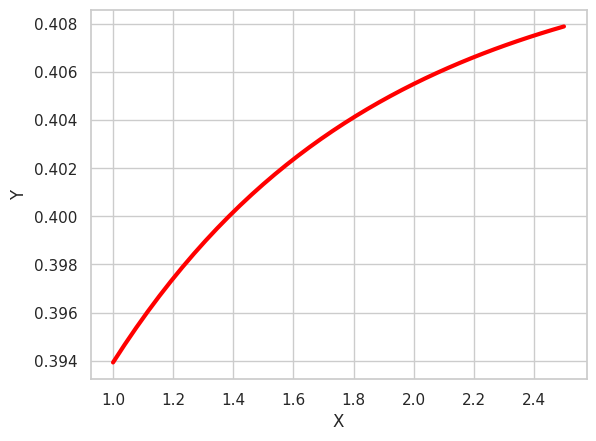

In [10]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=newY.detach(),
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [12]:
optimizer = optim.SGD(simpleNN.parameters(), lr=0.01)
loss = nn.MSELoss()
for epoch in range(101):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = simpleNN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        # Retain the graph for multiple backward passes
        loss_value.backward(retain_graph=True)

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()


Epoch:  0  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0014, grad_fn=<AddBackward0>)
Epoch:  15  | Total 

In [13]:
pred_y = simpleNN(X)
pred_y

tensor([0.6598, 0.6610, 0.6622, 0.6633, 0.6644, 0.6654, 0.6664, 0.6673, 0.6682,
        0.6691, 0.6699, 0.6707, 0.6715, 0.6722, 0.6729, 0.6735, 0.6742, 0.6748,
        0.6753, 0.6759, 0.6764, 0.6769, 0.6774, 0.6779, 0.6783, 0.6787, 0.6792,
        0.6795, 0.6799, 0.6803, 0.6806, 0.6810, 0.6813, 0.6816, 0.6819, 0.6821,
        0.6824, 0.6827, 0.6829, 0.6832], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

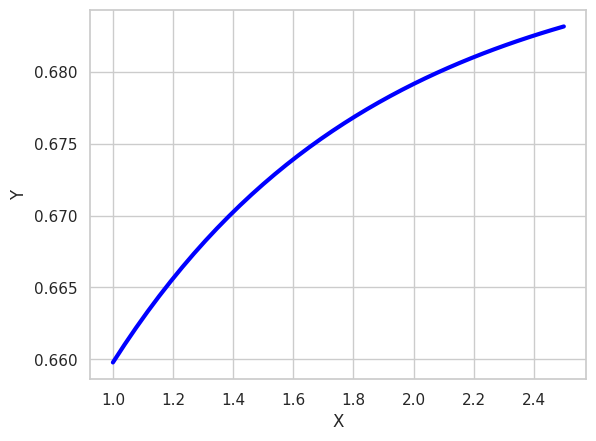

In [14]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='blue',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')